**IBM Nalaiyathiran**

***team Id :PNT2022TMID03961***

**TEAM MEMBERS**
**JERISH JOHNSON D A
  JANARTHANAN S
  ARUN KUMAR K
  HARISH M U**

**Libraries and dataset**

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [86]:
admission_df = pd.read_csv('Admission_Predict.csv')

In [87]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [88]:
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


**Data Analysis**

In [89]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [90]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [91]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [92]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [93]:
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


**Data Virtualisation**

In [94]:
admission_df.shape

(400, 8)

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

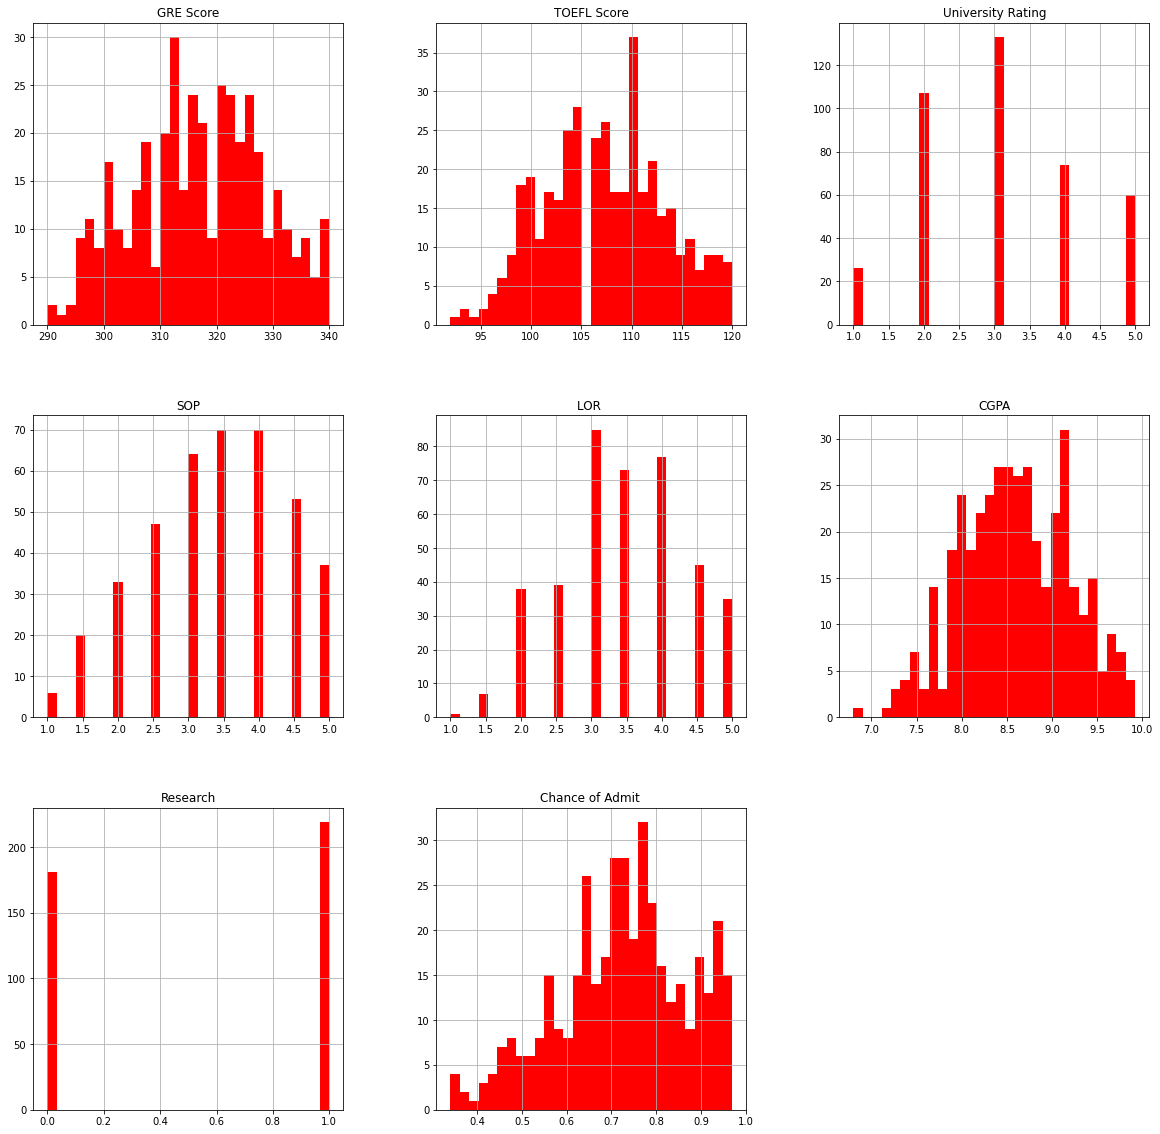

In [95]:
admission_df.hist(bins = 30, figsize = (20, 20), color = 'r')

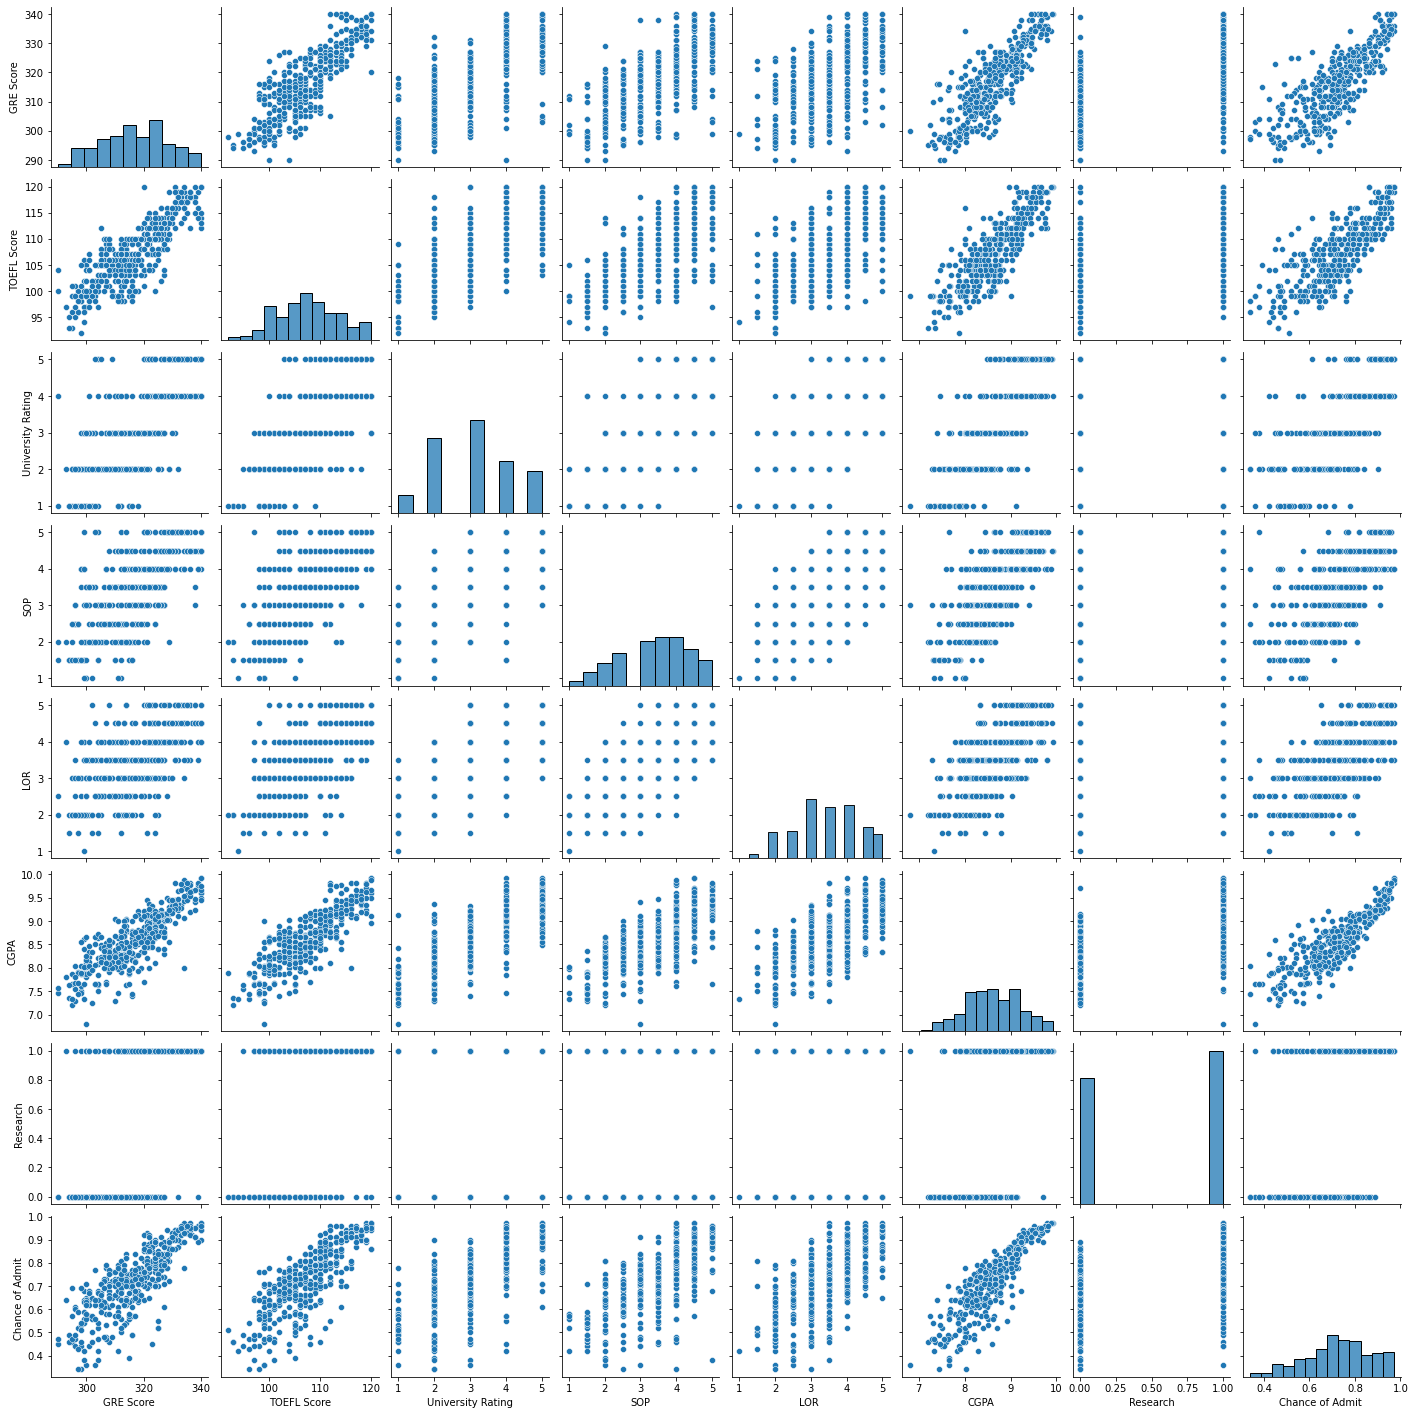

In [96]:
sns.pairplot(admission_df)

Text(0.5, 1.0, 'GRE Score Vs Chance of Admission')

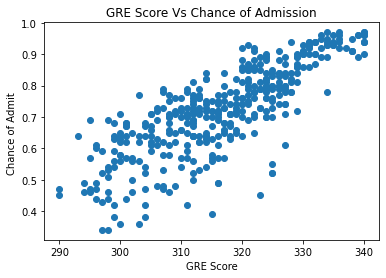

In [97]:
plt.scatter(admission_df['GRE Score'], admission_df['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')
plt.title('GRE Score Vs Chance of Admission')

Text(0.5, 1.0, 'TOEFL Score Vs Chance of Admission')

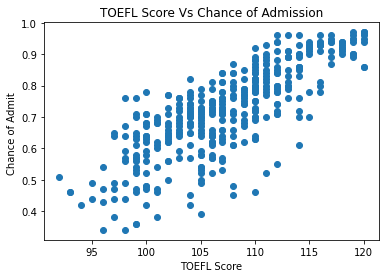

In [98]:
plt.scatter(admission_df['TOEFL Score'], admission_df['Chance of Admit '])
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit ')
plt.title('TOEFL Score Vs Chance of Admission')

Text(0.5, 1.0, 'University Ranking Vs CGPA')

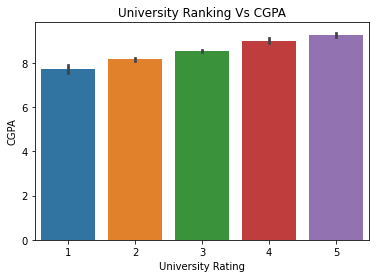

In [99]:
plt.figure(figsize=(6, 4))
sns.barplot(x='University Rating', y='CGPA', data=admission_df)
plt.title('University Ranking Vs CGPA')

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

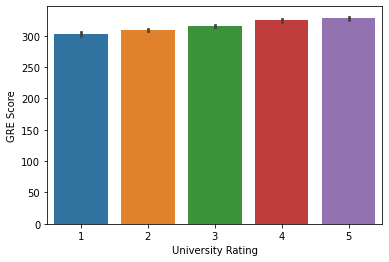

In [100]:
plt.figure(figsize=(6, 4))
sns.barplot(x='University Rating', y='GRE Score', data=admission_df)

<AxesSubplot:xlabel='University Rating', ylabel='TOEFL Score'>

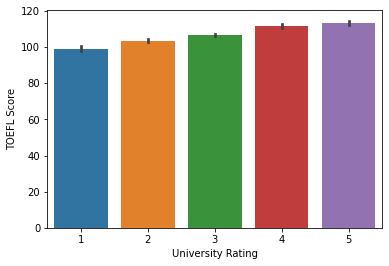

In [101]:
plt.figure(figsize=(6, 4))
sns.barplot(x='University Rating', y='TOEFL Score', data=admission_df)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

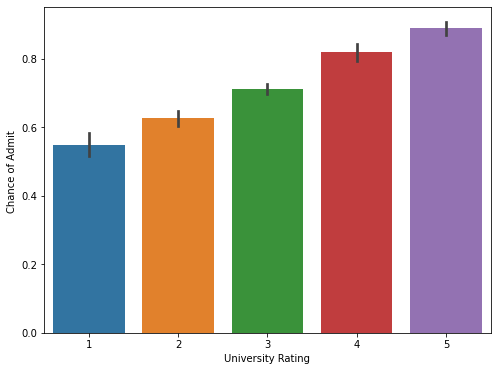

In [102]:
plt.figure(figsize=(8, 6))
sns.barplot(x='University Rating', y='Chance of Admit ', data=admission_df)

Text(0, 0.5, 'Frequency')

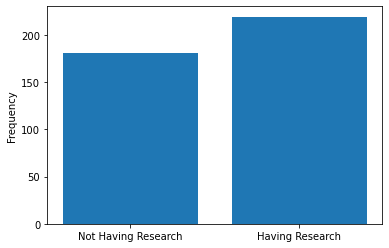

In [103]:
x = ['Not Having Research', 'Having Research']
y = np.array([len(admission_df[admission_df.Research == 0]),
              len(admission_df[admission_df.Research == 1])])
plt.bar(x, y)
plt.ylabel('Frequency')

<AxesSubplot:xlabel='University Rating', ylabel='Research'>

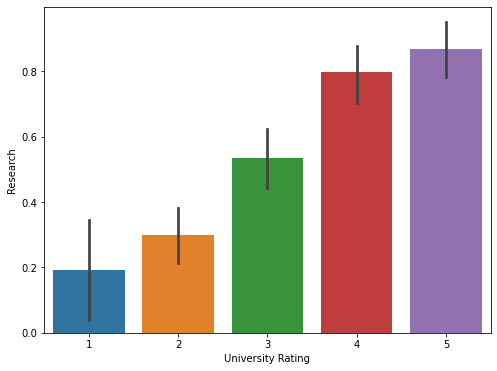

In [104]:
plt.figure(figsize=(8,6))
sns.barplot(x='University Rating',y='Research',data=admission_df)

Text(0, 0.5, 'SOP')

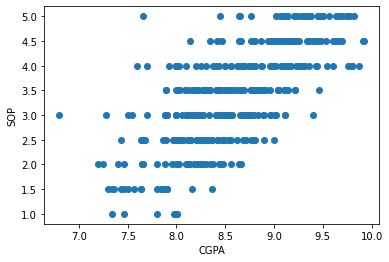

In [105]:
plt.scatter(admission_df['CGPA'],admission_df['SOP'])
plt.xlabel('CGPA')
plt.ylabel('SOP')

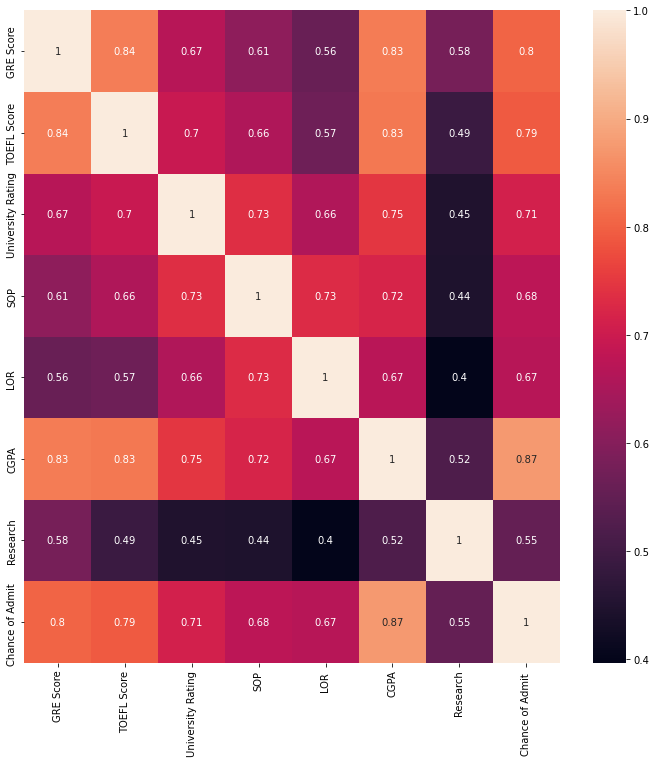

In [106]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix,annot = True)
plt.show()

**Training and test data set**

In [146]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [108]:
X = admission_df.drop(columns = ['Chance of Admit '])

In [109]:
y = admission_df['Chance of Admit ']

In [110]:
X.shape

(400, 7)

In [111]:
y.shape

(400,)

In [112]:
X = np.array(X)
y = np.array(y)

In [113]:
y = y.reshape(-1, 1)
y.shape

(400, 1)

In [114]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [115]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

**Train and evaluate Regression Model**

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [118]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)
y_pred_lr = LinearRegression_model.predict(X_test)

In [119]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8279343840569255

**Evaluating decision tree and Random Forest Models**

In [120]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
DecisionTree_model = DecisionTreeRegressor(random_state=42)
DecisionTree_model.fit(X_train, y_train)
y_pred_dtr = DecisionTree_model.predict(X_test)

In [121]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.6662086870032116

In [122]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred_dtr))
print('MSE',metrics.mean_squared_error(y_test,y_pred_dtr))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtr)))

MAE 0.432958311758081
MSE 0.37956131338566107
RMSE 0.6160854757139314


In [123]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, random_state=37)
RandomForest_model.fit(X_train, y_train)
y_pred_rfr = RandomForest_model.predict(X_test)

C:\Users\user\AppData\Local\Temp\ipykernel_6124\1120462969.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, y_train)


In [124]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.795279306985655

**Resgression Models**

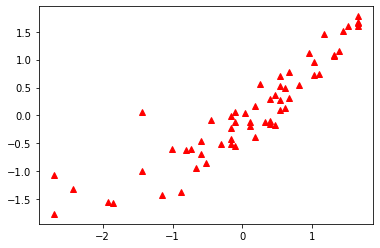

In [125]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'r')

In [126]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

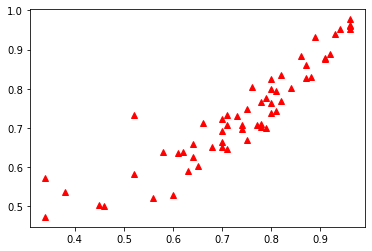

In [127]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [128]:
k = X_test.shape[1]
n = len(X_test)
n

60

In [129]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.063 
MSE = 0.003969262204179716 
MAE = 0.04439100712864568 
R2 = 0.8279343840569254 
Adjusted R2 = 0.8047717049876654


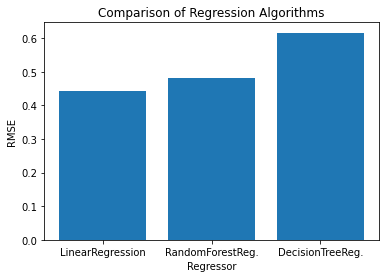

In [130]:
from sklearn import metrics
y = np.array([np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)),np.sqrt(metrics.mean_squared_error(y_test,y_pred_rfr)),np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtr))])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("RMSE")
plt.show()

In [131]:
X = [1,2,3,4]
X = np.array(X)
X = X.reshape(-1,1)

print(X.shape)

(4, 1)


**Preparing model for Deployement using LinearRegression**

In [132]:
data = pd.read_csv('Admission_Predict.csv')

In [133]:
data=data.rename(columns = {'Chance of Admit ':'Chance of Admit '})

In [134]:
X = data.drop(["Serial No.","University Rating","SOP","LOR ","Research","Chance of Admit "],axis=1)
y = data["Chance of Admit "].values

In [135]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'CGPA'], dtype='object')

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=37)

In [137]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

In [138]:
from sklearn.linear_model import LinearRegression
lr_new = LinearRegression()
lr_new.fit(X_train_new,y_train_new)
y_pred_lr_new = lr_new.predict(X_test_new)

In [139]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_pred_lr_new))
print('MSE',metrics.mean_squared_error(y_test,y_pred_lr_new))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr_new)))

MAE 0.044689049492380825
MSE 0.0037381159665602908
RMSE 0.0611401338448019


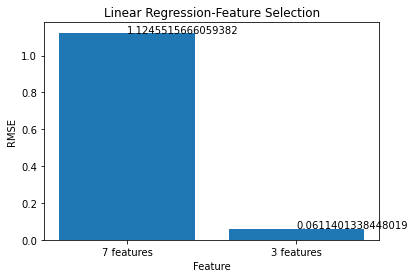

In [140]:
y = np.array([np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)),np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr_new))])
x = ["7 features","3 features"]
plt.bar(x,y)
for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.title("Linear Regression-Feature Selection")
plt.xlabel("Feature")
plt.ylabel("RMSE")
plt.show()

**Model creation Pickle File**

In [141]:
pickle.dump(lr_new, open('model.pkl','wb'))

In [142]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[312,112,8.87]]))

[0.7605009]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
